In [7]:
import numpy as np

In [9]:
from matplotlib import pyplot as plt

In [15]:
import pandas as pd

In [17]:
data = pd.read_csv('use mnist dataset from kaggle')

In [19]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.shape

(60000, 785)

In [23]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

dev = data[0:1000].T
X_dev = dev[1:n]
X_dev = X_dev / 255.
y_dev = dev[0]

train = data[1000:m].T
X_train = train[1:n]
X_train = X_train / 255.
y_train = train[0]


In [217]:
_,m_train = X_train.shape

In [219]:
print(m_train)

59000


In [31]:
print(n)

785


In [45]:
X_train[:,0].shape

(784,)

In [145]:
y_train.size

59000

In [25]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    B1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    B2 = np.random.rand(10,1) - 0.5
    return W1, B1, W2, B2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A


def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0

def back_prop(W1, B1, W2, B2, A1, A2, Z1, Z2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1 / m * np.sum(dZ2, axis=1).reshape(-1, 1)

    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    dB1 = 1 / m * np.sum(dZ1, axis=1).reshape(-1, 1)
    return dW1, dB1, dW2, dB2

def update_params(W1, B1, W2, B2, dW1, dW2, dB1, dB2, alpha):
    W1 = W1 - alpha * dW1
    W2 = W2 - alpha * dW2
    B1 = B1 - alpha * dB1
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2  
    


In [39]:
def get_prediction(A2):
    return np.argmax(A2, 0)

def get_accuracy(prediction, Y):
    print(prediction, Y)
    return np.sum(prediction == Y)/ Y.size
    
def gradient_descent(X, Y, iterations, alpha):
    W1, B1, W2, B2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(W1, B1, W2, B2, A1, A2, Z1, Z2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dW2, dB1, dB2, alpha)
        if i % 100 == 0:
            print("iterations", i)
            predictions = get_prediction(A2)
            print(get_accuracy(predictions, Y))        
    return W1, B1, W2, B2 
        
    

In [41]:
W1, B1, W2, B2 = gradient_descent(X_train, y_train, 500, 0.1)

iterations 0
[3 7 4 ... 7 7 7] [7 0 5 ... 8 0 3]
0.12111864406779661
iterations 100
[7 0 5 ... 1 6 3] [7 0 5 ... 8 0 3]
0.6458644067796611
iterations 200
[7 0 5 ... 8 6 3] [7 0 5 ... 8 0 3]
0.7774576271186441
iterations 300
[7 0 5 ... 8 0 3] [7 0 5 ... 8 0 3]
0.8190169491525424
iterations 400
[7 0 5 ... 8 0 3] [7 0 5 ... 8 0 3]
0.8414237288135593


In [43]:
def make_prediction(X, W1, B1, W2, B2):
    _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_prediction(A2)
    return predictions

def test_prediction(index, W1, B1, W2, B2):
    current_image = X_train[:, index, None]
    prediction = make_prediction( X_train[:, index, None], W1, B1, W2, B2)
    label = y_train[index]
    print("Prediction : " , prediction)
    print("Label : ", label)
    
    current_image = current_image.reshape((28,28))* 255
    plt.gray()
    plt.imshow(current_image, interpolation = 'nearest')
    plt.show()



Prediction :  [7]
Label :  7


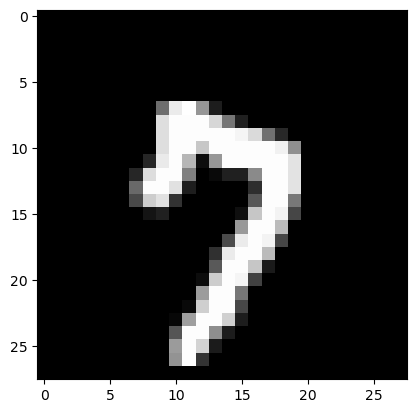

Prediction :  [0]
Label :  0


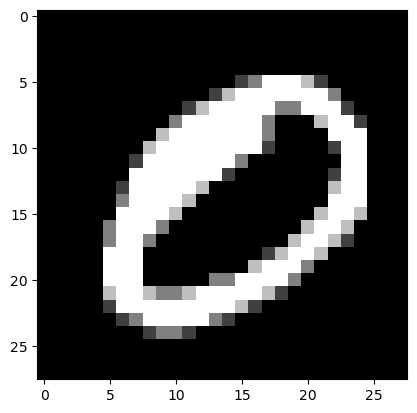

Prediction :  [5]
Label :  5


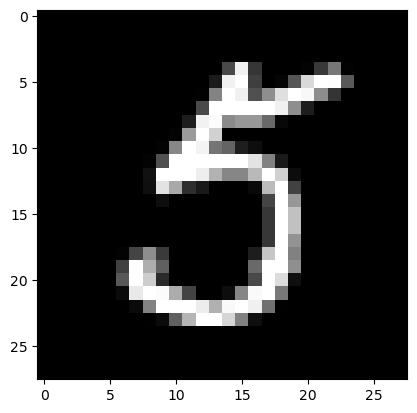

Prediction :  [8]
Label :  8


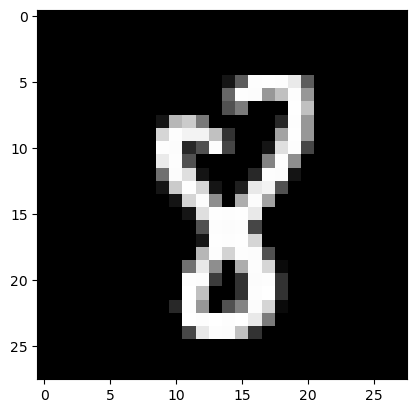

In [49]:
test_prediction(0, W1, B1, W2, B2)
test_prediction(1, W1, B1, W2, B2)
test_prediction(2, W1, B1, W2, B2)
test_prediction(3, W1, B1, W2, B2)


In [279]:
dev_prediction =  make_prediction(X_dev, W1, B1, W2, B2)
get_accuracy(dev_prediction, y_dev)

[9 9 6 0 9 0 2 7 0 1 9 2 1 8 4 6 1 0 0 7 7 1 4 3 9 2 8 5 5 6 1 1 9 1 6 7 0
 1 3 8 6 4 4 7 4 9 7 3 0 0 0 9 5 5 2 7 4 8 4 9 3 0 0 8 7 0 1 1 3 6 4 8 1 2
 8 7 3 2 4 8 2 4 4 2 6 6 8 7 3 1 2 5 0 7 0 7 6 9 0 7 6 0 3 4 7 4 5 4 3 5 4
 1 0 7 2 2 8 7 9 1 3 5 0 5 6 3 6 7 6 8 8 5 6 0 5 3 4 6 7 7 5 3 1 7 2 3 2 8
 1 0 4 4 8 5 5 3 4 4 7 8 7 1 6 0 7 5 0 7 4 7 9 6 5 1 9 9 1 9 7 4 9 2 9 7 5
 0 6 5 6 8 6 1 1 3 3 2 3 8 3 9 9 3 6 6 9 6 7 6 8 0 7 8 0 4 2 0 4 4 4 2 1 5
 1 1 5 2 0 0 2 8 0 2 6 2 4 8 1 3 0 8 9 0 7 1 4 5 8 0 4 0 7 4 3 1 2 9 4 3 3
 9 3 8 0 9 3 9 1 8 6 6 4 4 6 4 7 6 5 4 3 6 2 8 1 2 1 0 1 6 1 1 6 3 4 8 6 5
 4 5 9 9 3 1 1 9 8 1 4 9 8 4 1 6 2 7 8 4 3 6 9 9 2 2 9 1 7 3 2 2 9 5 0 1 7
 1 1 9 2 4 0 4 5 3 8 1 2 6 7 6 0 9 1 8 8 7 2 6 6 9 7 5 5 9 0 5 7 4 1 6 5 3
 1 5 8 1 4 9 8 5 3 4 9 6 3 4 6 9 6 5 1 6 0 6 9 6 4 2 3 5 8 7 2 1 5 7 3 9 9
 1 0 7 6 3 8 9 1 9 9 1 2 8 9 8 7 2 4 5 5 6 2 6 1 6 7 0 5 6 2 3 7 8 4 3 8 8
 5 7 7 3 6 6 6 0 9 4 9 3 1 9 3 6 1 2 8 6 8 1 1 0 7 9 2 1 5 9 7 2 6 9 2 2 4
 9 0 4 0 3 2 0 3 1 4 1 7 

0.819

Please enter the file path of the image:  C:/Users/hp/Neural Network using Maths/number7.webp


[[ 10]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [ 17]
 [  4]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 11]
 [  5]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 12]
 [  5]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 12]
 [  5]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 12]
 [  5]
 [  0]
 [  0]

C:\Users\hp\AppData\Local\Temp\ipykernel_21860\1058278392.py:12: RuntimeWarning: overflow encountered in exp
  A = np.exp(Z) / sum(np.exp(Z))
C:\Users\hp\AppData\Local\Temp\ipykernel_21860\1058278392.py:12: RuntimeWarning: invalid value encountered in divide
  A = np.exp(Z) / sum(np.exp(Z))


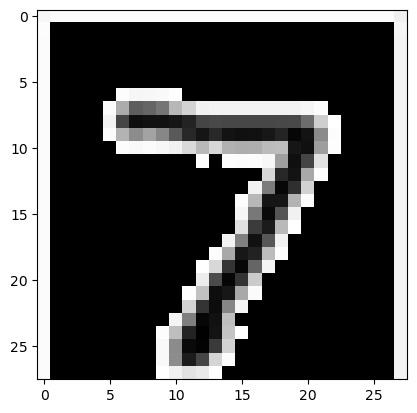

In [77]:
from PIL import Image

def load_and_process_image(file_path):
    img = Image.open(file_path).convert('L')
    img = img.resize((28,28))
    img_array = np.array(img)
    ing_array = img_array/255.0
    img_array = img_array.flatten().reshape(-1,1)
    print(img_array)
    return img_array


def test_prediction(file_path, W1, B1, W2, B2):
    current_image = load_and_process_image(file_path)    
    prediction = make_prediction(current_image, W1, B1, W2, B2)
    
    print("Prediction : ", prediction)
    
    current_image_display = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image_display, interpolation='nearest')
    plt.show()

file_path = input("Please enter the file path of the image: ")
test_prediction(file_path, W1, B1, W2, B2)
